In [102]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

dfWell = pd.read_csv('wellness.csv')
dfWell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 19 columns):
Date                   5011 non-null object
PlayerID               5011 non-null int64
Fatigue                5011 non-null int64
Soreness               5011 non-null int64
Desire                 5011 non-null int64
Irritability           5011 non-null int64
BedTime                5011 non-null object
WakeTime               5011 non-null object
SleepHours             5011 non-null float64
SleepQuality           5011 non-null int64
MonitoringScore        5011 non-null int64
Pain                   5011 non-null object
Illness                5011 non-null object
Menstruation           4995 non-null object
Nutrition              4174 non-null object
NutritionAdjustment    4266 non-null object
USGMeasurement         4843 non-null object
USG                    629 non-null float64
TrainingReadiness      5011 non-null object
dtypes: float64(2), int64(7), object(10)
memory usage: 743.9+ K

In [103]:
dfWell.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,No,NaN,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,NaN,NaN,Yes,1.010,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,NaN,NaN,Yes,1.016,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,Yes,1.025,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,Yes,1.022,100%


In [104]:
dfWell.Menstruation.value_counts()

No     4285
Yes     710
Name: Menstruation, dtype: int64

In [105]:
dfWell.Nutrition.value_counts()

Excellent    2713
Okay         1398
Poor           63
Name: Nutrition, dtype: int64

In [106]:
dfWell.NutritionAdjustment.value_counts()

Yes             3727
No               439
I Don't Know     100
Name: NutritionAdjustment, dtype: int64

In [107]:
# As Menstruation, Nutrition and Nutrition Adjustment are categorical, fill NA with their Modes
dfWell.Menstruation.fillna(dfWell.Menstruation.mode()[0],inplace=True)
dfWell.Nutrition.fillna(dfWell.Nutrition.mode()[0],inplace=True)
dfWell.NutritionAdjustment.fillna(dfWell.NutritionAdjustment.mode()[0],inplace=True)
dfWell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 19 columns):
Date                   5011 non-null object
PlayerID               5011 non-null int64
Fatigue                5011 non-null int64
Soreness               5011 non-null int64
Desire                 5011 non-null int64
Irritability           5011 non-null int64
BedTime                5011 non-null object
WakeTime               5011 non-null object
SleepHours             5011 non-null float64
SleepQuality           5011 non-null int64
MonitoringScore        5011 non-null int64
Pain                   5011 non-null object
Illness                5011 non-null object
Menstruation           5011 non-null object
Nutrition              5011 non-null object
NutritionAdjustment    5011 non-null object
USGMeasurement         4843 non-null object
USG                    629 non-null float64
TrainingReadiness      5011 non-null object
dtypes: float64(2), int64(7), object(10)
memory usage: 743.9+ K

In [108]:
dfWell.Menstruation.value_counts()

No     4301
Yes     710
Name: Menstruation, dtype: int64

In [109]:
dfWell.Nutrition.value_counts()

Excellent    3550
Okay         1398
Poor           63
Name: Nutrition, dtype: int64

In [110]:
dfWell.NutritionAdjustment.value_counts()

Yes             4472
No               439
I Don't Know     100
Name: NutritionAdjustment, dtype: int64

In [111]:
# As USG measurement has almost 87% NA, it doesn't make sense to fill NA with random or mean values. 
# Hence, drop USG related columns
dfWell = dfWell.drop(['USGMeasurement', 'USG'], axis=1)
dfWell.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,Excellent,Yes,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,Excellent,Yes,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,100%


In [112]:
# We do not require Bed Time and Wake Time as well. We'll be using SleepHours instead
dfWell = dfWell.drop(['BedTime', 'WakeTime'], axis=1)
# Convert TrainingReadiness from String to fraction
dfWell['TrainingReadiness'] = dfWell['TrainingReadiness'].str.rstrip('%').astype('float') / 100.0 * 7

In [113]:
dfWell.Pain.value_counts()

No     4423
Yes     588
Name: Pain, dtype: int64

In [114]:
dfWell.Illness.value_counts()

No              4456
Slightly Off     421
Yes              134
Name: Illness, dtype: int64

In [115]:
# Convert into numerical values
dfWell.Pain = np.where(dfWell.Pain == 'No', 1, 0)
dfWell.Menstruation = np.where(dfWell.Menstruation == 'No', 1, 0)
dfWell.Nutrition = np.where(dfWell.Nutrition == 'Poor', 0, np.where(dfWell.Nutrition == 'Okay', 1, 2))
dfWell.Illness = np.where(dfWell.Illness == 'Yes', 0, np.where(dfWell.Illness == 'Slightly Off', 1, 2))
dfWell.NutritionAdjustment = np.where(dfWell.NutritionAdjustment == 'No', 0, \
                                      np.where(dfWell.NutritionAdjustment == 'I Don\'t Know', 1, 2))
dfWell.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,TrainingReadiness
0,2018-07-21,1,3,3,2,3,8.00,2,13,1,2,0,2,2,0.00
1,2018-07-21,2,4,3,4,4,8.00,4,19,0,2,0,2,2,0.00
2,2018-07-21,3,3,3,5,4,8.00,4,19,1,2,1,2,2,7.00
3,2018-07-21,4,2,3,5,4,6.50,1,15,1,2,0,2,2,6.65
4,2018-07-21,5,5,3,4,4,7.25,4,20,1,2,1,1,2,7.00


In [116]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
df = dfWell[dfWell.columns.difference(['Date','PlayerID','MonitoringScore'])]
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(10209.44506669854, 0.0)

In [117]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
kmo_model

0.7230727699430893

In [118]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 12, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,2.867840
1,1.550185
2,1.163748
3,1.079430
4,0.990381
5,0.955426
6,0.885087
7,0.663733
8,0.566753
9,0.500336


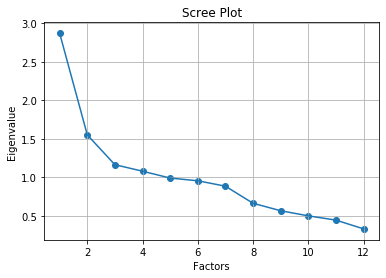

In [119]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [120]:
fa.analyze(df, 4, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4
Desire,0.297775,0.014830,-0.018263,0.826713
Fatigue,0.680681,-0.005057,0.027876,0.481921
Illness,0.083225,0.071866,0.125495,0.110502
Irritability,0.469493,0.046278,0.004567,0.365455
Menstruation,0.022113,0.063481,0.020381,0.033328
Nutrition,0.047010,0.675161,0.051184,-0.029770
NutritionAdjustment,-0.015880,0.726706,-0.021174,-0.000230
Pain,0.030785,0.050629,0.995425,0.039629
SleepHours,0.334700,0.057831,0.020863,-0.088249
SleepQuality,0.713932,0.088429,0.078114,0.116014


In [121]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4
SS Loadings,1.554890,1.021801,1.030533,1.334318
Proportion Var,0.129574,0.085150,0.085878,0.111193
Cumulative Var,0.129574,0.214724,0.300602,0.411795


In [99]:
# Time Series Analysis
def player_ema(PlayerID, span=7):
    feature_ema = PlayerID.rolling(window=span, min_periods=span).mean()[:span]
    rest = PlayerID[span:]
    return pd.concat([feature_ema, rest]).ewm(span=span, adjust=False).mean()

# dfWell.groupby('PlayerID').apply(player_ema)
# dfWell.head()

In [85]:
# dfWell = dfWell.set_index(['PlayerID','Date']).sort_index()
dfWell.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,TrainingReadiness
0,2018-07-21,1,3,3,2,3,8.00,2,13,0,2,1,2,2,0.00
1,2018-07-21,2,4,3,4,4,8.00,4,19,1,2,1,2,2,0.00
2,2018-07-21,3,3,3,5,4,8.00,4,19,0,2,0,2,2,1.00
3,2018-07-21,4,2,3,5,4,6.50,1,15,0,2,1,2,2,0.95
4,2018-07-21,5,5,3,4,4,7.25,4,20,0,2,0,1,2,1.00
